In [3]:
import tensorflow as tf



In [4]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [5]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [6]:
def createdataframe(dir):
    image_paths = [] # List to store paths of images
    labels = [] # List to store paths of images

    # Loop through each label (subdirectory) in the given directory
    for label in os.listdir(dir):
        # Loop through each image in the label's subdirectory
        for imagename in os.listdir(os.path.join(dir,label)):
            # Construct the full path to the image and add it to the image_paths list
            image_paths.append(os.path.join(dir,label,imagename))
             # Add the label corresponding to the image to the labels list
            labels.append(label)
        print(label, "completed") # Print the completion status for the label
    return image_paths,labels # Return the lists of image paths and labels


In [7]:
train = pd.DataFrame() 
train['image'], train['label'] = createdataframe(TRAIN_DIR) # Populate the DataFrame with image paths and labels

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(train)

                                             image     label
0         images/train\angry\Training_10118481.jpg     angry
1         images/train\angry\Training_10120469.jpg     angry
2         images/train\angry\Training_10131352.jpg     angry
3         images/train\angry\Training_10161559.jpg     angry
4          images/train\angry\Training_1021836.jpg     angry
...                                            ...       ...
28704  images/train\surprise\Training_99916297.jpg  surprise
28705  images/train\surprise\Training_99924420.jpg  surprise
28706  images/train\surprise\Training_99937001.jpg  surprise
28707  images/train\surprise\Training_99951755.jpg  surprise
28708  images/train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [9]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(test)
print(test['image'])

                                             image     label
0       images/test\angry\PrivateTest_10131363.jpg     angry
1       images/test\angry\PrivateTest_10304478.jpg     angry
2        images/test\angry\PrivateTest_1054527.jpg     angry
3       images/test\angry\PrivateTest_10590091.jpg     angry
4        images/test\angry\PrivateTest_1109992.jpg     angry
...                                            ...       ...
7173  images/test\surprise\PublicTest_98089595.jpg  surprise
7174  images/test\surprise\PublicTest_98567249.jpg  surprise
7175  images/test\surprise\PublicTest_98972870.jpg  surprise
7176  images/test\surprise\PublicTest_99242645.jpg  surprise
7177  images/test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]
0         images/test\angry\PrivateTest_10131363.jpg
1         images/test\angry\PrivateTest_10304478.jpg
2          images/test\angry\PrivateTest_1054527.jpg
3         images/test\angry\PrivateTest_10590091.jpg
4          images/test\angry\Pr

In [11]:
from tqdm.notebook import tqdm

In [12]:
from tensorflow.keras.preprocessing.image import load_img


In [13]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        # Load the image in grayscale
        img = load_img(image, color_mode="grayscale", target_size=(48, 48))
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # Reshape to (num_samples, 48, 48, 1) for grayscale images if not already in this shape
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [14]:
# def extract_features(images):
#     features = []
#     for image in tqdm(images):
#         img = load_img(image,grayscale =  True )
#         img = np.array(img)
#         features.append(img)
#     features = np.array(features)
#     features = features.reshape(len(features),48,48,1)
#     return features
    

In [15]:
# calling the extract_features function with the image paths from train DataFrame
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [16]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [17]:
# normalizing the image feature arrays for training and testing datasets.
x_train = train_features/255.0
x_test = test_features/255.0

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [20]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [21]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [22]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

d:\ProgramFiles\anaconda3\envs\new_tf_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# configuring the compilation of a machine learning model using the Keras API
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [24]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 573s 3s/step - accuracy: 0.2542 - loss: 1.8189 - val_accuracy: 0.2471 - val_loss: 1.8137
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - accuracy: 0.2487 - loss: 1.8083 - val_accuracy: 0.2672 - val_loss: 1.7461
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 461s 2s/step - accuracy: 0.2785 - loss: 1.7338 - val_accuracy: 0.3355 - val_loss: 1.6468
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3418 - loss: 1.6423

In [25]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [26]:
from keras.models import model_from_json

In [28]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [29]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [30]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [31]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


TypeError: load_img() got an unexpected keyword argument 'grayscale'

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [33]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad


TypeError: load_img() got an unexpected keyword argument 'grayscale'

In [34]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear


TypeError: load_img() got an unexpected keyword argument 'grayscale'

In [35]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust


TypeError: load_img() got an unexpected keyword argument 'grayscale'

original image is of happy
1/1 [==============================] - 0s 42ms/step
model prediction is  happy


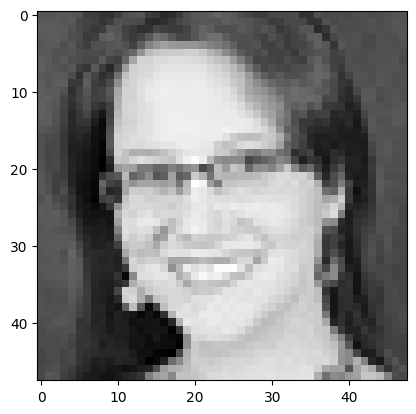

In [45]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 40ms/step
model prediction is  surprise


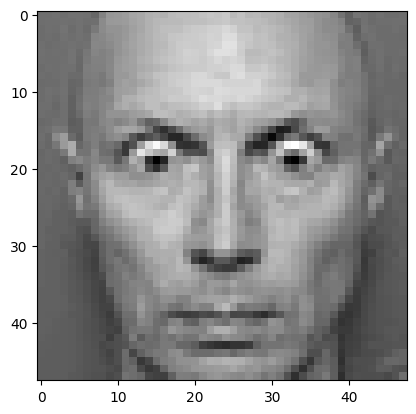

In [46]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')